In [1]:
%matplotlib inline
import numpy as np  # Import the numerical python library as np
import pandas as pd  # Pandas library is imported as pd to work on data structures
import matplotlib.pyplot as plt  # for visualisation
from sklearn.model_selection import train_test_split  #Training set, Test set distribution function
from sklearn.linear_model import LinearRegression  # Validation Linear Regression library-function
from sklearn.metrics import r2_score  #Coefficient of Determination sci-kit function

In [2]:
class multivariate_linear_regression:
    
    def get_filename(self):
        """
        This functions asks the user to input a filename, checks whether it exists and
        contains necessary data, then returns the file name.    
        
        Returns
        ------
        string: 
            returns the input filename 
        """
        while True:
            print("\nAvailable datasets:\n\t1.dataEnergy.csv\n\t2.dataLoans.csv\n")
            filename=str(input("Enter filename: "))
            try:
                df=pd.read_csv(filename)
                #Checks for file existence
                if not df.empty:
                    #Checks for insufficient data
                    if df.shape[1]<2:
                        print("Insufficient Data. Try a different file")
                        filename=self.get_filename()
                        break
                    break
                
                
            except IOError:
                print ("\nThere is no such dataset available, please try again\n")
        
        return filename
    
    def read_filename(self, filename):
        """
        Creates a Dataframe after reading the file. 
        
        Parameters
        ----------
        filename: string
        
        Returns
        -------
        Pandas Dataframe
        """
        df=pd.read_csv(filename)
        df=pd.DataFrame(df)  #DataFrame creation
        return df
    
    def dataframe_split(self, file, filename):
        """
        This function uses the file name in splitting a dataframe into 
        two numpy arrays of predictors and predicted.
        
        Parameters
        ----------
        file: Pandas Dataframe
        filename: string
        
        Returns
        ------
        x_data: ndarray - Predictors of the Dataframe
        y_data: ndarray - Response values of the Dataframe 
        """
        #filling the nan values
        df=file.fillna(file.mean())
        #Splitting the dataframe based on the file name
        if filename=="dataLoans.csv":
            x_data=df[["FICO.Score","Loan.Amount"]].values
            y_data=df["Interest.Rate"].values
        else:
            x_data=file.values[:,:-1]
            y_data=file.values[:,-1]
        
        return x_data,y_data
    
    def standardize(self, x):
        """
        Rescales the predictor data.
        
        Parameters
        ----------
        x: ndarray - Predictor dataset that needs to be normalised
        
        Returns
        -------
        ndarray: 
            x_std - standardised predictor dataset
        """
        x_mean=np.mean(x,axis=0)
        sigma=np.std(x,axis=0,ddof=1)
        x_std=(x-x_mean)/sigma
        
        return x_std
    
    def cost(self, x, y, theta):
        """
        Computes the cost using mean square error.
        
        Parameters
        ----------
        x: ndarray - Predictor dataset with 'r' predictors
        y: ndarray - Predicted values dataset
        theta: ndarray - vector of weights
        
        Returns
        -------
        float: 
            c - cost/mean square error
        """
        z=x.dot(theta)
        error=np.subtract(z,y)
        sqr=np.square(error)
        c=1/(2*x.shape[0])*np.sum(sqr)  #Cost calculation
        
        return c
    
    def gradient_descent(self, x, y, lrate, iters):
        """
        This function implements the Gradient Descent algorithm and checks for convergence.
        
        Parameters
        ----------
        x: ndarray - Predictor Dataset with 'r' predictors
        y: ndarray - Response values dataset 
        
        Returns
        -------
        theta_values: list - regression parameter values
        cost_values: list - cost function value at every iteration
        converge_result: list - tells whether the weights converged and the iteration of convergence
        """
        #Initialise necessary parameters
        theta=np.zeros(x.shape[1])
        cost_values=[]
        theta_values=[]
        converge_result=["no","-"]

        #Gradient descent algorithm implementation
        for i in range(0,iters,1):
            z=x.dot(theta)
            error=np.subtract(z,y)
            step_size=(lrate/x.shape[0])*x.transpose().dot(error)
            theta=theta-step_size  #Updates regression parameters
            cost_values.append(self.cost(x,y,theta))
            theta_values.append(theta)
        
            #Checking convergence of regression parameters
            if i>0:
                converge=self.convergence(theta_values[i-1],theta_values[i])
                #Breaking iteration when convergence is achieved
                if converge==True:
                    converge_result=["YES",i+1]
                    break  
                    
        return theta_values[-1],cost_values,converge_result
    
    def convergence(self, x, y):
        """
        Checks the convergence of weight vector
        
        Parameters
        ----------
        x: ndarray - vector of weights
        y: ndarray - successive weight vector to x
        
        Returns
        -------
        bool: 
            True or False - states whether the vectors converge or not
        """
        c=0
        #Checks the difference between two vectors falls below threshold limit set
        for i in range(len(x)):
            if abs(x[i]-y[i])<1e-16:
                c+=1
        #Making sure all the parameters converge
        if c==len(x):
            return True
        else:
            return False
    
    def lrate_iters_effect(self, x, y, lrate_var, iters_var):
        """
        This function tries various combinations of iterations and learning rates
        when the gradient descent algorithm is called upon.
        
        Parameters
        ----------
        x: ndarray - Training predictor dataset for training the regression model
        y: ndarray - Training predicted dataset for training the regression model
        lrate_var: list - various learning rates
        iters_var: list - different iteration values
        
        Returns
        -------
        theta_values: list - theta vector values 
        cost_values: list - cost function values
        converge_values: list - convergence result values
        iter_values: list - iteration step values
        lrate_values: list - learning rate values
            
        """
        iter_values=[]
        lrate_values=[]
        theta_values=[]
        cost_values=[]
        converge_values=[]
        #Calling the gradient descent function for each iteration and learn rate combination
        for iters in iters_var:
            for lrate in lrate_var:
                theta,cost,converge=self.gradient_descent(x,y,lrate,iters)
                #Storing the results separately
                iter_values.append(iters)
                lrate_values.append(lrate)
                theta_values.append(theta)
                cost_values.append(cost)
                converge_values.append(converge)
                
        return theta_values,cost_values,converge_values,iter_values,lrate_values

    def sum_squared_error(self, x, y):
        """
        Computes the squared difference of two variables.
        
        Parameters
        ----------
        x: ndarray
        y: ndarray
        
        Returns
        -------
        ndarray: 
            squared error values
        """
        return np.square(np.subtract(x,y)).sum()
    

    def r_squared(self,y_test,y_pred):
        """
        Computes the r-squared value of a model.         
             r-squared = 1 - (SSE/SST) 
             where,
             SSE = sum of squares of errors
             SST = sum of squares total
        
        Parameters
        ----------
        y_test: ndarray - testing predicted values dataset from Dataframe
        y_pred: list - predicted values dataset using computed regression parameters

        Returns
        -------
        float :
            r-square value
        """
        y_mean=[np.mean(y_test) for y in y_test]
        SSE=self.sum_squared_error(y_test,y_pred)
        SST=self.sum_squared_error(y_test,y_mean)

        return 1-(SSE/SST)
    
    
    def y_prediction(self,x_test,theta_pred):
        """
        Predicts new values using the testing dataset.
        
        
        Parameters
        ----------
        x_test: ndarray -  Testing predictor values dataset
        theta_pred: list -  Predicted regression parameters of various regression solutions
        
        Returns:
        --------
        list: 
            y_pred contains lists of predicted values for various regression solutions
        """
        y_pred=[]
        for i in range(x_test.shape[0]):
            #Predictions for each model
            y_pred.append(x_test[i].dot(theta_pred))
            
        return y_pred           
    
    def regression_eq(self,theta):
        """
        Returns the regression parameter solution list as a string.
        
        Parameter
        ---------
        theta: list - theta vector consisting the regression parameters
        
        Returns
        -------
        string : 
            equation format of the regression solution
        """
        regr_eq="y="+str(theta[0])
        #Concatenating each element from list of weights
        for i in range(1,len(theta)):
            if theta[i]<0:
                regr_eq=regr_eq+str(theta[i])+"(X"+str(i)+")"
            else:
                regr_eq=regr_eq+"+"+str(theta[i])+"(X"+str(i)+")"
                
        return regr_eq

    
    def plot(self,cost_values,lrate_values,iter_values,m,n):
        """
        Plots the Cost vs Iterations graphs for all possible combinations of learning rate 
        and number of iterations .
        
        Parameters
        ----------
        cost_values: list - Cost values of each combination 
        lrate_values: list - Learning rates of each combination
        iter_values: list - Iteration values of each combination
        
        Returns
        -------
        None
        """
        plt.style.use('ggplot')
        #Plotting done using for-loops 
        for i in range(m):
            plt.rcParams["figure.figsize"] = (12,6)
            for j in range(i*n,(i+1)*n):
                plt.plot(range(1,len(cost_values[j])+1),cost_values[j],label=lrate_values[j])
                plt.grid()
            plt.xlabel("Number of iterations")
            plt.ylabel("Cost")
            plt.title("Effect of learning rate on Cost function(Convergence) when Iterations = "+str(iter_values[j]))
            plt.legend(title="Learning Rate")
            plt.show()
            print("\n")
            
    def best_r_square(self,combinations,r_square_result,lrate_values,iter_values,theta_eq,Convergence):
        """
        Prints the best learning rate and iteration value combination.
        
        Parameters
        ----------
        r_square_result: r-squared values of possible combinations
        lrate_values: Learning rate of possible combinations
        iter_values: Iteration values of possible combinations
        theta_eq: regression equation of possible combinations
        
        Returns
        -------
        int or bool:
            returns an integer if a model is said to converge else returns a bool value
        
        """
        c=0
        for i in range(combinations):
            if Convergence[i]=="YES":
                print('Best learning rate and iteration value combination model:\n'
                'Learning rate: %.2f \n''Number of Iterations: %d \n'
                'Regression equation: %s \n''Coefficient of Determination: %.6f \n'
                %(lrate_values[i],iter_values[i],theta_eq[i],r_square_result[i]))
                return i
            c+=1
        if c==combinations:
            print("There is no good model found from all the possible combinations")
            return False

#### Preparing the data before applying Gradient descent algorithm

In [3]:
#Class instance creation
multiregr = multivariate_linear_regression()

In [4]:
#Getting the filename 
file_name=multiregr.get_filename()


Available datasets:
	1.dataEnergy.csv
	2.dataLoans.csv

Enter filename: dataLoans.csv


In [5]:
#Read the file
df=multiregr.read_filename(file_name)
#Splitting the dataset into predictor and predicted
x,y=multiregr.dataframe_split(df,file_name)

In [6]:
#Standardisation of predictor data
X=multiregr.standardize(x)

In [7]:
#Stacking a row of ones to predictor dataset
X=np.hstack((np.ones((X.shape[0],1)),X))

In [8]:
#Split the dataset into Training and Test data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
# Initialising the learn rates and iteration values
iters_var=[10,50,100,1000,10000]
lrate_var=[0.1,0.01,0.001,0.0001]

#Finding the number of possible combinations
m=len(iters_var)
n=len(lrate_var)
combinations=len(iters_var)*len(lrate_var)

#### Applying the gradient descent algorithm 

In [10]:
theta_values,cost_values,convergence_values,iter_values,lrate_values=multiregr.lrate_iters_effect(x_train,y_train,lrate_var,iters_var)

#### Extracting and processing useful data from the results

In [11]:
#Final cost after each combination
Cost = [cost_values[i][-1] for i in range(combinations)]
#Model Parameter Vector in equation format
theta_eq=[multiregr.regression_eq(theta) for theta in theta_values]
#Convergence result
Convergence = [convergence_values[i][0] for i in range(combinations)]
#Convergence iteration step
Convergence_iteration = [convergence_values[i][1] for i in range(combinations)]

In [12]:
#Predictions using gradient descent regression parameters
y_pred=[multiregr.y_prediction(x_test,Theta) for Theta in theta_values]

In [13]:
#Finding the r-square values
r_square_result=[multiregr.r_squared(y_test,ypred) for ypred in y_pred]

#### Displaying the results

In [14]:
#Creating a dataframe using useful data
var_df=pd.DataFrame({'Iterations':iter_values,'Learning Rate':lrate_values,'Theta':theta_eq,'Cost':Cost,'Convergence':Convergence,'Convergence iteration':Convergence_iteration,'R-Squared':r_square_result})
display(var_df)

,Iterations,Learning Rate,Theta,Cost,Convergence,Convergence iteration,R-Squared
0,10,0.1000,y=820.6032825290455+20.086200130940586(X1)+1.8...,3.560654e+05,no,-,-0.295118
1,10,0.0100,y=120.48680900678592+3.6311931891506535(X1)-0....,9.090566e+05,no,-,-2.275636
2,10,0.0010,y=12.544552800420961+0.38594191155222823(X1)-0...,1.038009e+06,no,-,-2.746778
3,10,0.0001,y=1.25954631789015+0.03883057229473616(X1)-0.0...,1.052165e+06,no,-,-2.798592
4,50,0.1000,y=1253.389656262057+19.416811031554143(X1)+9.1...,2.596009e+05,no,-,-0.002897
5,50,0.0100,y=497.6869276850316+13.580381777381477(X1)+0.2...,5.501268e+05,no,-,-0.977002
6,50,0.0010,y=61.485710028700794+1.8725777018519403(X1)-0....,9.780949e+05,no,-,-2.527673
7,50,0.0001,y=6.285148123518373+0.19356839969662692(X1)-0....,1.045845e+06,no,-,-2.775458
8,100,0.1000,y=1259.8760510427735+18.934640431033444(X1)+9....,2.595795e+05,no,-,-0.003901
9,100,0.0100,y=798.7390831125432+19.403480400426353(X1)+1.8...,3.659119e+05,no,-,-0.328669


In [15]:
#Best combination when model converges
best=multiregr.best_r_square(combinations,r_square_result,lrate_values,iter_values,theta_eq,Convergence)

Best learning rate and iteration value combination model:
Learning rate: 0.10 
Number of Iterations: 1000 
Regression equation: y=1259.9101448029926+18.928948912028012(X1)+9.450711876607212(X2) 
Coefficient of Determination: -0.003906 



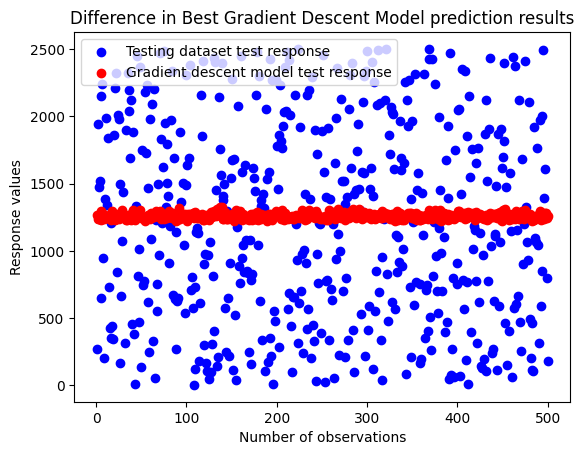

In [16]:
#Plot the response values of test response and predicted response for best model
if best!=False:
    plt.scatter(range(1,x_test.shape[0]+1),y_test,color='blue',label='Testing dataset test response')
    plt.scatter(range(1,x_test.shape[0]+1),y_pred[best],color='red',label='Gradient descent model test response')
    plt.xlabel("Number of observations")
    plt.ylabel("Response values")
    plt.title("Difference in Best Gradient Descent Model prediction results")
    plt.legend()
    plt.show()

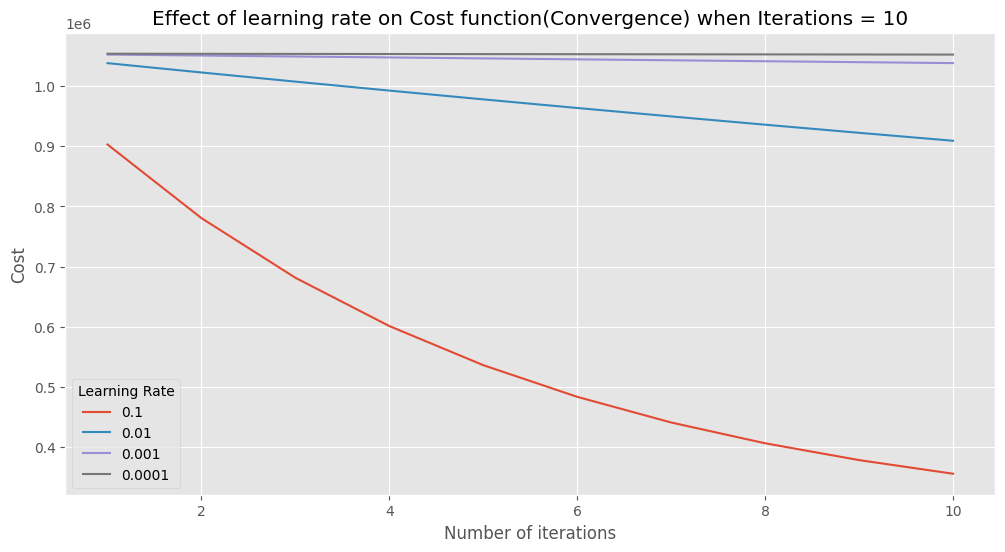

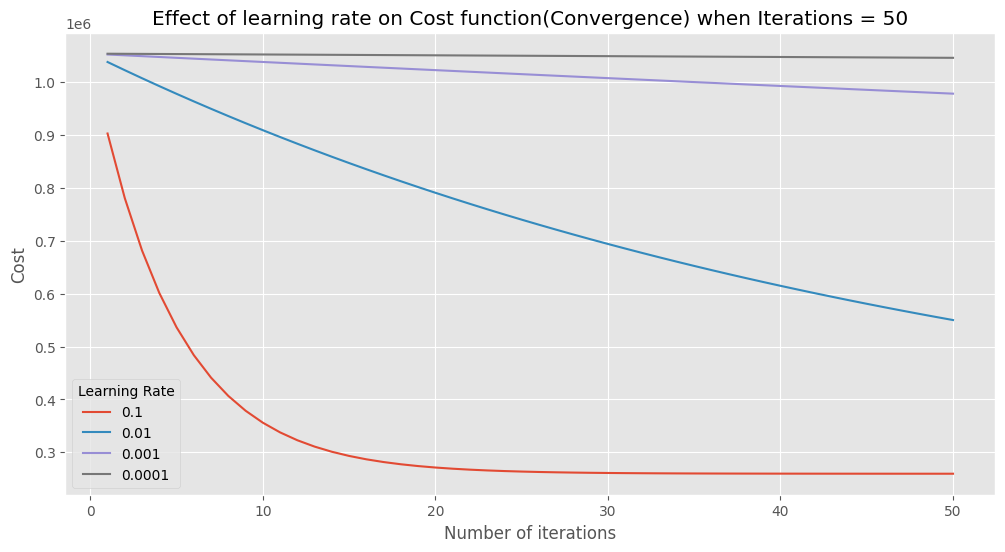

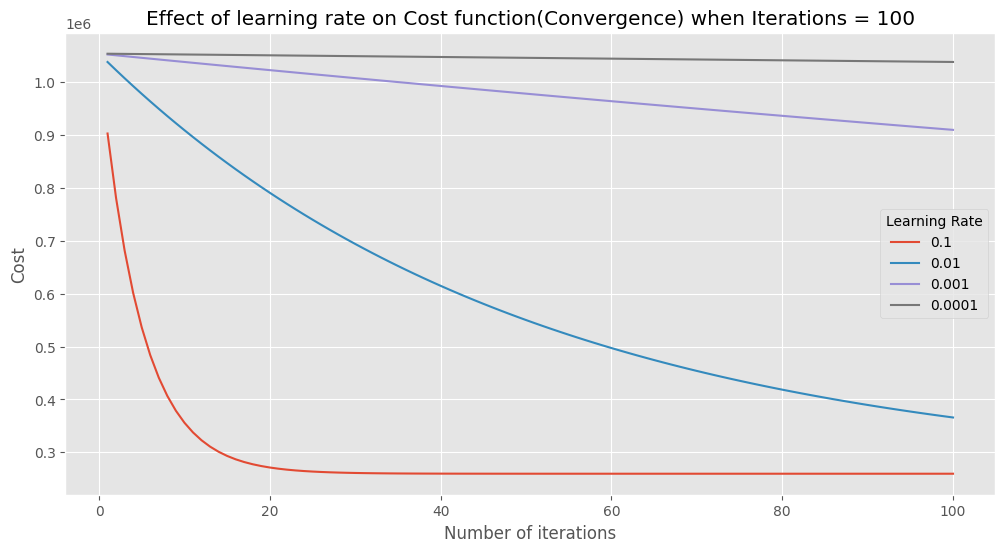

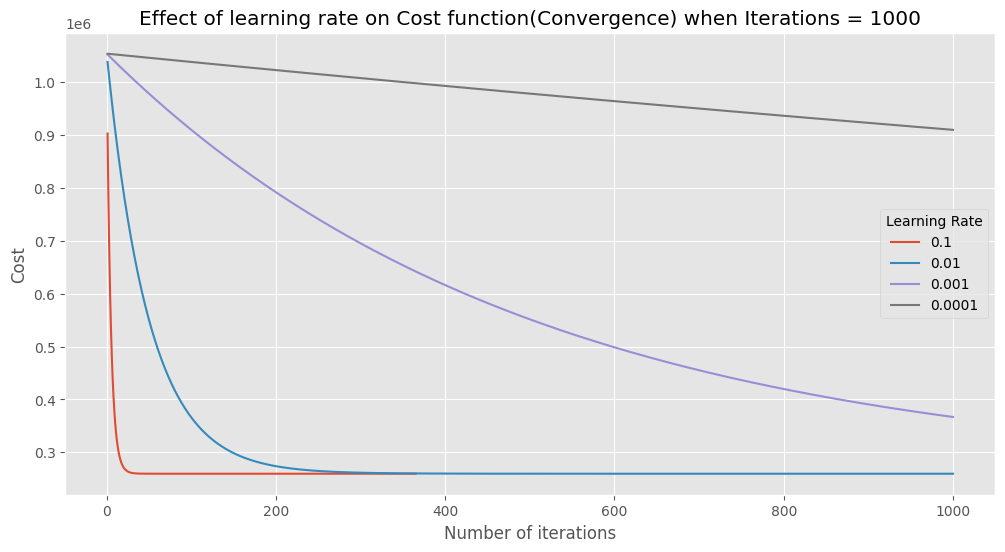

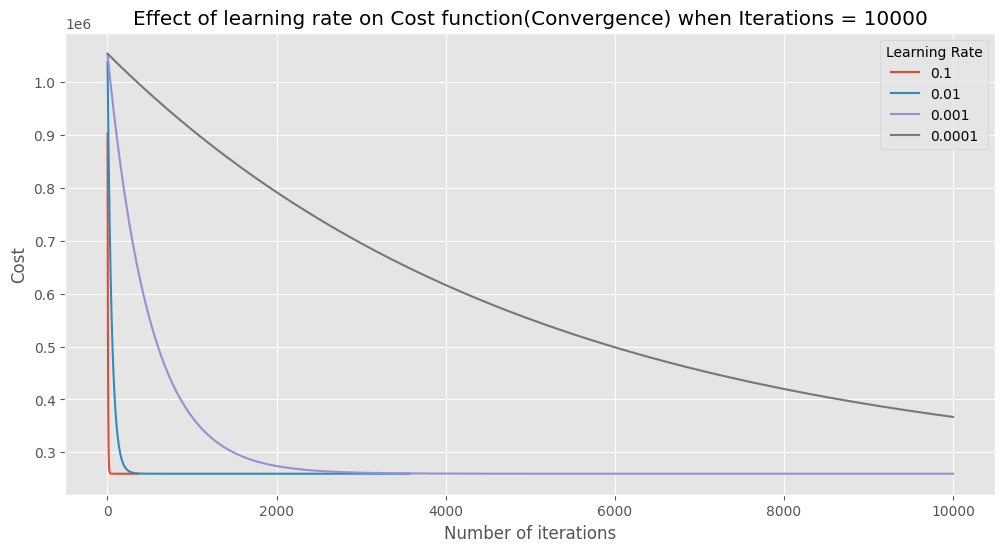

In [17]:
#Visualise the effect of learning rates on cost function
multiregr.plot(cost_values,lrate_values,iter_values,m,n)

# Validation

In [18]:
#Read file
df_val=pd.read_csv(file_name)
df_val=pd.DataFrame(df_val)

In [19]:
#Dataframe split
x_val,y_val=multiregr.dataframe_split(df_val,file_name)

In [20]:
#Standardizing the predictor data for validation
X_val=multiregr.standardize(x_val)

In [21]:
#Training and Test data split
x_train_val,x_test_val,y_train_val,y_test_val = train_test_split(X_val,y,test_size=0.2,random_state=0)

In [22]:
#Linear Regression
mr=LinearRegression().fit(x_train_val,y_train_val)

In [23]:
#Predict the values using the validation model
y_pred_val=mr.predict(x_test_val)

In [24]:
print("Regression line intercept: %.8f" % mr.intercept_)
print("Regression line coefficients:",mr.coef_)

Regression line intercept: 1259.91014480
Regression line coefficients: [18.92894891  9.45071188]


In [25]:
print("Coefficient of determination(r-squared value): %.6f" % r2_score(y_test_val,y_pred_val))

Coefficient of determination(r-squared value): -0.003906


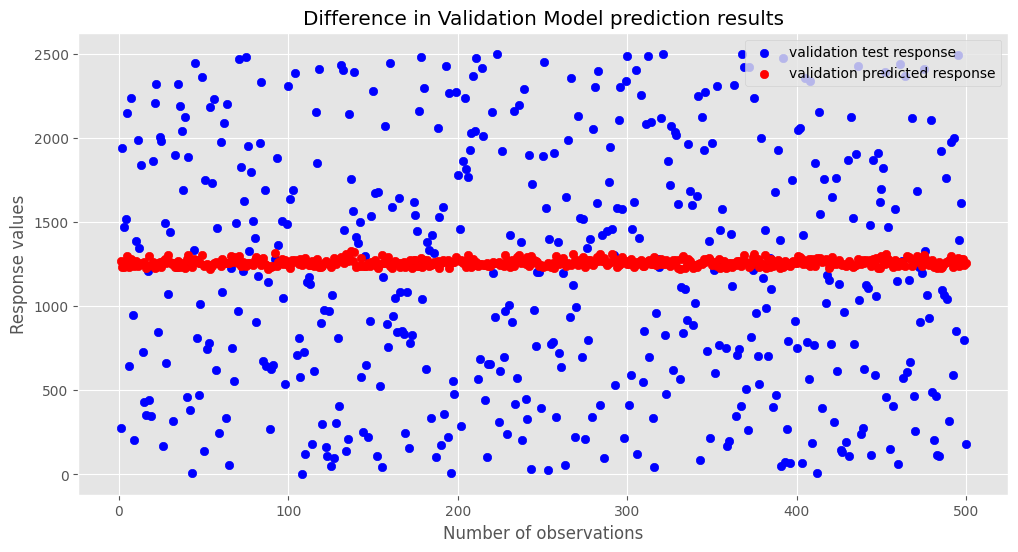

In [26]:
#Plot the response values of test response and predicted response
plt.scatter(range(1,x_test_val.shape[0]+1),y_test_val,color='blue',label='validation test response')
plt.scatter(range(1,x_test_val.shape[0]+1),y_pred_val,color='red',label='validation predicted response')
plt.xlabel("Number of observations")
plt.ylabel("Response values")
plt.title("Difference in Validation Model prediction results")
plt.legend()
plt.show()